In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("jsrt_metadata.csv")

In [3]:
df

,study_id,subtlety,size,age,gender,x,y,state,position,diagnosis
0,JPCLN001.png,5.0,15.0,53,Male,1634.0,692.0,malignant,l.upper lobe,lung cancer
1,JPCLN002.png,5.0,30.0,78,Female,1614.0,1090.0,benign,l.upper lobe(S5),pulmonary hematoma
2,JPCLN003.png,5.0,30.0,63,Female,1303.0,447.0,malignant,l.upper lobe(S1+2),lung cancer
3,JPCLN004.png,5.0,14.0,68,Female,606.0,836.0,benign,r.upper lobe,Inflammatory mass
4,JPCLN005.png,5.0,35.0,73,Female,1438.0,692.0,malignant,l.upper lobe(S3),lung cancer
...,...,...,...,...,...,...,...,...,...,...
242,JPCNN089.png,NaN,NaN,50,Male,NaN,NaN,non-nodule,NaN,NaN
243,JPCNN090.png,NaN,NaN,68,Female,NaN,NaN,non-nodule,NaN,NaN
244,JPCNN091.png,NaN,NaN,81,Male,NaN,NaN,non-nodule,NaN,NaN
245,JPCNN092.png,NaN,NaN,70,Female,NaN,NaN,non-nodule,NaN,NaN


In [4]:
df.isnull().sum()

study_id      0
subtlety     93
size         93
age           0
gender        0
x            93
y            93
state         0
position     93
diagnosis    93
dtype: int64

In [5]:
m = df['subtlety'].astype('float').mean()
df['subtlety'].replace(np.nan,m, inplace = True)

In [6]:
m = df['size'].astype('float').mean()
df['size'].replace(np.nan,m, inplace = True)

In [7]:
m = df['x'].astype('float').mean()
df['x'].replace(np.nan,m, inplace = True)

m = df['y'].astype('float').mean()
df['y'].replace(np.nan,m, inplace = True)

In [8]:
mx = df['position'].value_counts().idxmax()
df['position'].replace(np.nan,mx, inplace = True)

mx = df['diagnosis'].value_counts().idxmax()
df['diagnosis'].replace(np.nan,mx, inplace = True)

In [9]:
df.isnull().sum()

study_id     0
subtlety     0
size         0
age          0
gender       0
x            0
y            0
state        0
position     0
diagnosis    0
dtype: int64

In [10]:
mm = df['diagnosis'].value_counts()

In [11]:
mm

lung cancer                                       149
lung cancer(adenocarcinoma)                        23
tuberculoma                                        14
granuloma                                           8
lung cancer(bronchioloalveolar cell carcinoma)      7
unknown                                             4
metastasis of colon cancer                          4
inflammatory mass                                   4
pulmonary tuberculosis                              3
lung abscess                                        2
Cryptococcosis                                      2
lung cancer(squamous cell carcinoma)                2
Inflammatory mass                                   2
pulmonary hematoma                                  2
susp. inflammatory mass                             2
hamartoma                                           2
sclerosing hemangioma                               2
lung cancer(large cell carcinoma)                   1
susp. hamartoma             

In [12]:
import matplotlib as plt
from matplotlib import pyplot
#, explode = [0.1,0]
df['state'].value_counts()

malignant     100
non-nodule     93
benign         54
Name: state, dtype: int64

(array([157.,  45.,  11.,   5.,   8.,   7.,   3.,   3.,   4.,   4.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 [<matplotlib.patches.Polygon at 0x2031da14880>])

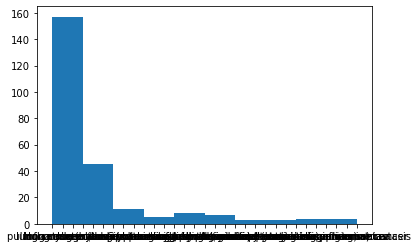

In [50]:
plt.pyplot.hist(df['diagnosis'], histtype = 'stepfilled')

In [14]:
df.replace("non-nodule",np.nan,inplace = True)
mx = df['state'].value_counts().idxmax()
df['state'].replace(np.nan,mx, inplace = True)

df.replace("unknown",np.nan,inplace = True)
mx = df['diagnosis'].value_counts().idxmax()
df['diagnosis'].replace(np.nan,mx, inplace = True)

([<matplotlib.patches.Wedge at 0x2031dc5fac0>,
 [Text(-0.850588847327074, 0.6974945252851811, 'Malignant'),
  Text(0.9279151774158769, -0.7609030316152393, 'Benign')],
 [Text(-0.4639575530874948, 0.38045155924646235, '78.1%'),
  Text(0.5412838534925948, -0.44386010177555624, '21.9%')])

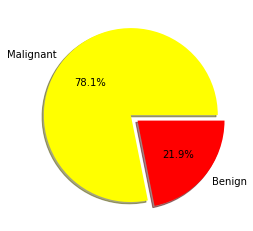

In [58]:
plt.pyplot.pie(df['state'].value_counts(),explode = [0,0.1]
              ,shadow = True,
               labels = ['Malignant','Benign'],
              colors = ['Yellow','Red'],
              autopct = '%1.1f%%')

In [16]:
df.to_csv("jsrt_metadata.csv")

In [17]:
df['diagnosis'].value_counts()

lung cancer                                       153
lung cancer(adenocarcinoma)                        23
tuberculoma                                        14
granuloma                                           8
lung cancer(bronchioloalveolar cell carcinoma)      7
metastasis of colon cancer                          4
inflammatory mass                                   4
pulmonary tuberculosis                              3
lung abscess                                        2
Cryptococcosis                                      2
lung cancer(squamous cell carcinoma)                2
Inflammatory mass                                   2
pulmonary hematoma                                  2
susp. inflammatory mass                             2
hamartoma                                           2
sclerosing hemangioma                               2
lung cancer(large cell carcinoma)                   1
susp. hamartoma                                     1
metastasis of uterine cancer